In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

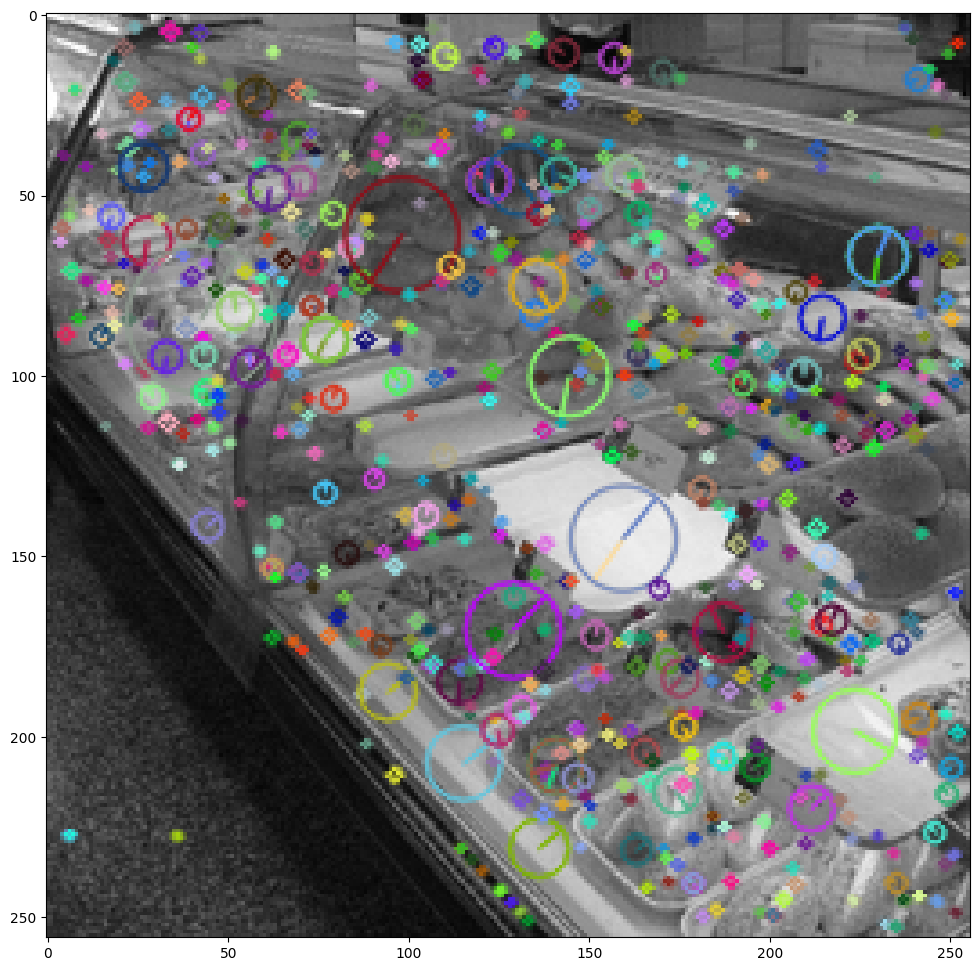

Number of keypoints: 762
Descriptor shape: (762, 128)


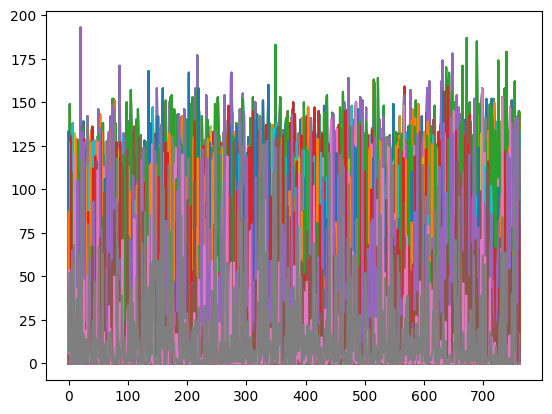

In [ ]:
def sift():
    # getting grayscaled image
    root = os.getcwd()
    imgPath = os.path.join(root, '../data/Images/bakery/asian_bakery.jpg')
    imgGray = cv.imread(imgPath, cv.IMREAD_GRAYSCALE)

    # getting sift descriptors
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(imgGray, None)  
    imgGray = cv.drawKeypoints(
        imgGray, keypoints, imgGray, 
        flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS # rich keypoints will show orientations and etc.. desciptors
    )
    
    plt.figure(figsize=(15, 12))
    plt.imshow(imgGray)
    plt.show()
    print(f"Number of keypoints: {len(keypoints)}")
    print(f"Descriptor shape: {descriptors.shape}")  # (num_keypoints, 128)
    plt.plot(descriptors)
    plt.show()
    
sift()

In [ ]:
# let's get ALL descriptors for ALL images and then cluster them
def get_sift_descriptors():
    sift = cv.SIFT_create()
    
    # descriptors will be all here for ALL keypoints
    all_descriptors = []

    # getting dir of buffet imgset
    rel_path = '../data/Images/buffet/'
    img_dir = os.path.join(os.getcwd(), rel_path)
    
    for filename in os.listdir(img_dir):
        img = None
    
        # skipping non-img extensions
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_grayscaled = cv.imread(os.path.join(rel_path, filename), cv.IMREAD_GRAYSCALE)
        else:
            continue
        
        # checking failed imread
        if img_grayscaled is None:
            print(f'Failed To Read Img at ./{os.path.join(img_dir, filename)} !')
            continue

        # rescaling img - my pc otherwise will burn
        img_grayscaled = cv.resize(img_grayscaled ,(512,512))

        # getting descriptors
        _, descriptors = sift.detectAndCompute(img_grayscaled, None)

        # append all keypoints' descriptors for each img as element
        all_descriptors.append(descriptors)

    # v-stack them
    if not all_descriptors: print("ERROR: no descriptors were extracted !")

    all_descriptors = np.vstack(all_descriptors)
    print(f'Total of {all_descriptors.shape[0]} descriptors successfully collected !')
    return all_descriptors
descriptors = get_sift_descriptors()

Total of 231603 descriptors successfully collected !


In [11]:
from sklearn.cluster import KMeans
import numpy as np


K = 50 # As required by your assignment

kmeans = KMeans(
    n_clusters=K,
    init='k-means++',
    n_init=10,
    random_state=42
)

kmeans.fit(descriptors)
plt.plot(kmeans.cluster_centers_)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.